In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
# Load the dataset from the provided file path
data = pd.read_csv(r"C:\Users\nehal\Documents\GitHub\msba265-finalstorage\data_storage\idioms.csv")

In [3]:
# Data Cleaning
print("Missing values per column:\n", data.isnull().sum())
data_cleaned = data.dropna()  # Drop rows with missing values

Missing values per column:
 No.             0
Text            0
Type            0
Label           0
Main emotion    0
dtype: int64


In [4]:
# Check and remove duplicates based on the 'Text' column
print(f"Duplicates before: {data_cleaned.duplicated(subset=['Text']).sum()}")
data_cleaned = data_cleaned.drop_duplicates(subset=['Text'])
print(f"Duplicates after: {data_cleaned.duplicated(subset=['Text']).sum()}")

Duplicates before: 3
Duplicates after: 0


In [5]:
# Standardizing column names
data_cleaned.columns = data_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")

In [6]:
# Display the cleaned data
print(data_cleaned.head())

   no.                                   text   type  label main_emotion
0    1                            A bad break  idiom      1     Negative
1    2                         A bad hair day  idiom      1     Negative
2    3  A bad workman always blames his tools  idiom      1     Negative
3    4                              A big ask  idiom      0      Neutral
4    5            A bigger bang for your buck  idiom      0     Positive


<function matplotlib.pyplot.show(close=None, block=None)>

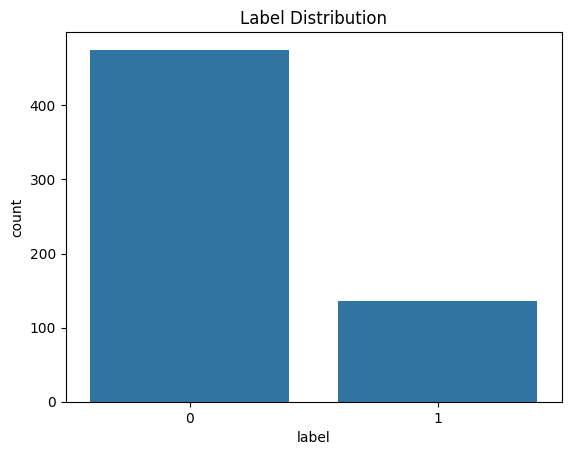

In [7]:
# Exploratory Data Analysis (EDA)
# Distribution of labels
sns.countplot(data=data_cleaned, x='label')
plt.title("Label Distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

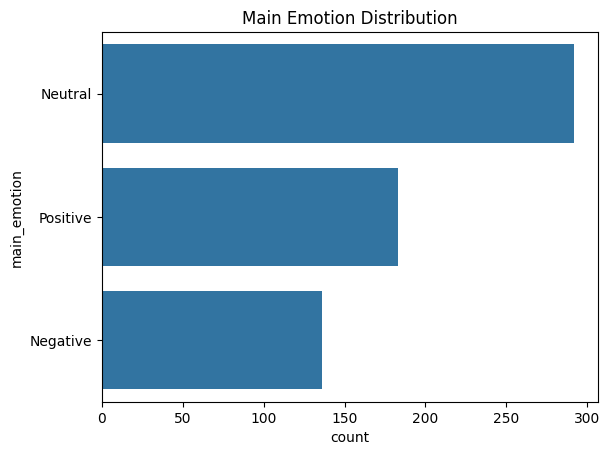

In [8]:
# Distribution of emotions
sns.countplot(data=data_cleaned, y='main_emotion', order=data_cleaned['main_emotion'].value_counts().index)
plt.title("Main Emotion Distribution")
plt.show

In [9]:
# Adding text length as a new feature
data_cleaned['text_length'] = data_cleaned['text'].apply(len)

<function matplotlib.pyplot.show(close=None, block=None)>

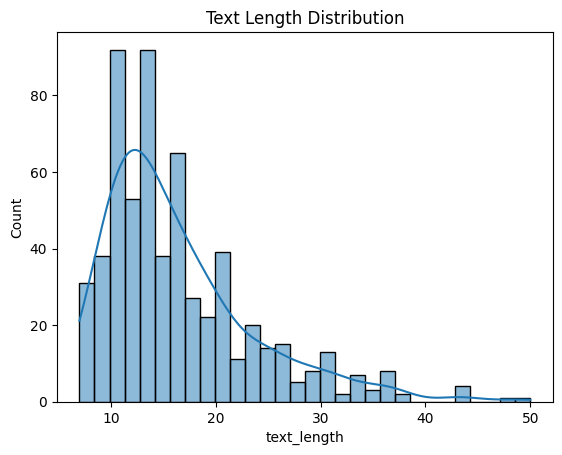

In [10]:
# Distribution of text lengths
sns.histplot(data=data_cleaned, x='text_length', bins=30, kde=True)
plt.title("Text Length Distribution")
plt.show

In [11]:
# Data Transformation
# Encoding 'Type' and 'Main emotion' using LabelEncoder
encoder = LabelEncoder()
data_cleaned['type_encoded'] = encoder.fit_transform(data_cleaned['type'])
data_cleaned['main_emotion_encoded'] = encoder.fit_transform(data_cleaned['main_emotion'])

In [12]:
# Vectorizing the 'Text' column using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=500)
text_vectors = vectorizer.fit_transform(data_cleaned['text']).toarray()

In [13]:
# Adding vectorized text as a new dataframe
vectorized_df = pd.DataFrame(text_vectors, columns=vectorizer.get_feature_names_out())
data_transformed = pd.concat([data_cleaned.reset_index(drop=True), vectorized_df], axis=1)

In [14]:
# Normalize 'text_length' using MinMaxScaler
scaler = MinMaxScaler()
data_transformed['text_length_normalized'] = scaler.fit_transform(data_transformed[['text_length']])

In [15]:
# Drop original 'Text' column if no longer needed
data_transformed = data_transformed.drop(columns=['text'])

In [16]:
# Preview the transformed dataset
print(data_transformed.head())

   no.   type  label main_emotion  text_length  type_encoded  \
0    1  idiom      1     Negative           11             0   
1    2  idiom      1     Negative           14             0   
2    3  idiom      1     Negative           37             0   
3    4  idiom      0      Neutral            9             0   
4    5  idiom      0     Positive           27             0   

   main_emotion_encoded  absence  act  adam  ...  worth  wouldn  wrist  wrong  \
0                     0        0    0     0  ...      0       0      0      0   
1                     0        0    0     0  ...      0       0      0      0   
2                     0        0    0     0  ...      0       0      0      0   
3                     1        0    0     0  ...      0       0      0      0   
4                     2        0    0     0  ...      0       0      0      0   

   yards  yarn  year  years  yellow  text_length_normalized  
0      0     0     0      0       0                0.093023  
1   

In [17]:
# Distribution Analysis
# Shape of the transformed data
print("Shape of transformed data:", data_transformed.shape)

Shape of transformed data: (611, 508)


In [18]:
# Label distribution
label_distribution = data_transformed['label'].value_counts(normalize=True)
print("Label Distribution:\n", label_distribution)

Label Distribution:
 label
0    0.777414
1    0.222586
Name: proportion, dtype: float64


In [19]:
# Emotion distribution
emotion_distribution = data_transformed['main_emotion_encoded'].value_counts(normalize=True)
print("Main Emotion Distribution:\n", emotion_distribution)

Main Emotion Distribution:
 main_emotion_encoded
1    0.477905
2    0.299509
0    0.222586
Name: proportion, dtype: float64


In [20]:
# Text length analysis
print("Text Length Stats:\n", data_transformed['text_length_normalized'].describe())

Text Length Stats:
 count    611.000000
mean       0.219122
std        0.167285
min        0.000000
25%        0.093023
50%        0.162791
75%        0.290698
max        1.000000
Name: text_length_normalized, dtype: float64
